# Mode identifier on theta-space

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
from itertools import product as prod
from __class_PhononConfig import TwistedRealspacePhonon
from pymatgen.io.vasp.inputs import Poscar
%matplotlib inline

In [13]:
# Change as necessary
ROOT = '/Users/jonathanlu/Documents'
DIRNAME = "tvGr"
n_at = 4
THSPC_DIR = "theta"
SAVE_LB = True
SAVE_S = False
LABELY = False

In [14]:
th_min, th_max, ntheta = np.loadtxt(f"{ROOT}/{DIRNAME}/theta.txt")
ntheta = int(ntheta)
KPT = 'Gamma'
print(f"{ntheta} angles from {th_min} to {th_max}")

101 angles from 0.01 to 10.0


In [15]:
# Import dataset from the directory
log_name = r'$\Gamma$' if KPT == 'Gamma' else KPT
path = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mags.npy'
ppath = f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_phonons.npy'
poscars_uc = [Poscar.from_file(f'{ROOT}/{DIRNAME}/POSCAR_LAYER{i+1}') for i in range(2)]
dataset = np.load(path)
phonons = np.load(ppath)
nmodes = dataset.shape[1]
print("Dataset shape:", dataset.shape)
print("Number of modes:", nmodes)
thetas = np.linspace(th_min, th_max, ntheta)

DMs = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/dms.npy')
GM_set = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/GM_set.npy')
k_set = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/k_set.npy')
bl_M = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/masses.npy')
mesh = np.load(f'{ROOT}/{DIRNAME}/{THSPC_DIR}/{KPT}/thspc_mesh.npy')
print(f"Mesh shape: {mesh.shape}")
print(f"K-point: {KPT}")

Dataset shape: (101, 61, 1521, 3)
Number of modes: 61
Mesh shape: (101, 1521, 2)
K-point: Gamma


## LB mode

Analyzing theta = 7.4026 (idx=74)


<Figure size 432x288 with 0 Axes>

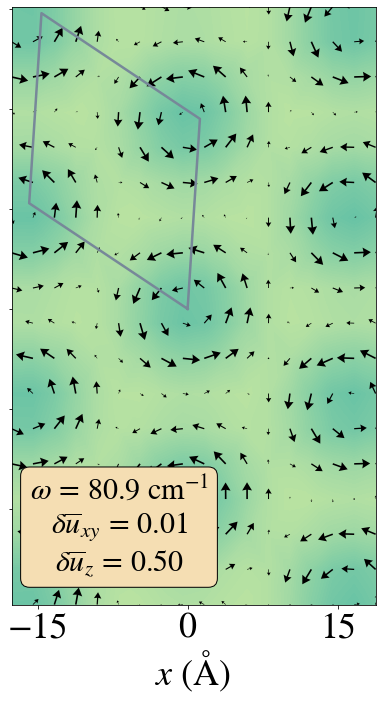

<Figure size 432x288 with 0 Axes>

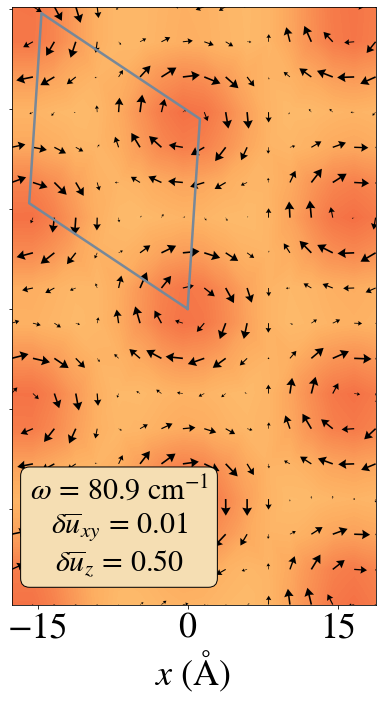

(array([[-17.59669212, -29.54981898],
        [-17.59669212, -26.03474247],
        [-17.59669212, -22.51966597],
        [-17.59669212, -19.00458946],
        [-17.59669212, -15.48951295],
        [-17.59669212, -11.97443645],
        [-17.59669212,  -8.45935994],
        [-17.59669212,  -4.94428344],
        [-17.59669212,  -1.42920693],
        [-17.59669212,   2.08586957],
        [-17.59669212,   5.60094608],
        [-17.59669212,   9.11602259],
        [-17.59669212,  12.63109909],
        [-17.59669212,  16.1461756 ],
        [-17.59669212,  19.6612521 ],
        [-17.59669212,  23.17632861],
        [-17.59669212,  26.69140511],
        [-17.59669212,  30.20648162],
        [-15.45654888, -29.54981898],
        [-15.45654888, -26.03474247],
        [-15.45654888, -22.51966597],
        [-15.45654888, -19.00458946],
        [-15.45654888, -15.48951295],
        [-15.45654888, -11.97443645],
        [-15.45654888,  -8.45935994],
        [-15.45654888,  -4.94428344],
        [-15

In [16]:
# Visualize the real-space phonons
THETA_IDX = 74
WHICH_MODE = 11
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

# k_set[THETA_IDX] = GM_set[THETA_IDX][:2]

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], n_at, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes),
                            rspc_sc_sz=2,
                            outdir=f'{ROOT}/data_mlph')
ph.plot_a_phonon(WHICH_MODE, save=SAVE_LB, outname='T.png', 
                 ticky=True, labely=LABELY, labelx=True, reduce_tick=True,
                 shift=0.01, flip=True)

Analyzing theta = 1.009 (idx=10)


/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


<Figure size 432x288 with 0 Axes>

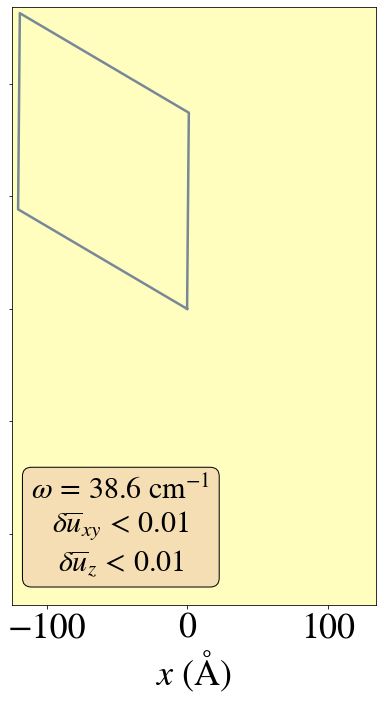

/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


<Figure size 432x288 with 0 Axes>

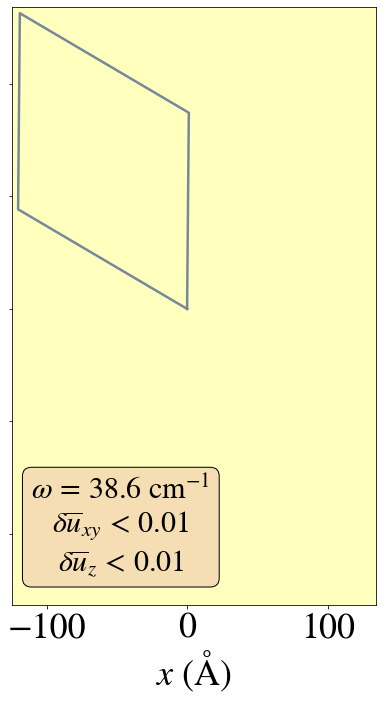

(array([[-124.29463082, -210.33857811],
        [-124.29463082, -185.31791065],
        [-124.29463082, -160.29724319],
        [-124.29463082, -135.27657573],
        [-124.29463082, -110.25590826],
        [-124.29463082,  -85.2352408 ],
        [-124.29463082,  -60.21457334],
        [-124.29463082,  -35.19390588],
        [-124.29463082,  -10.17323842],
        [-124.29463082,   14.84742904],
        [-124.29463082,   39.8680965 ],
        [-124.29463082,   64.88876397],
        [-124.29463082,   89.90943143],
        [-124.29463082,  114.93009889],
        [-124.29463082,  139.95076635],
        [-124.29463082,  164.97143381],
        [-124.29463082,  189.99210127],
        [-124.29463082,  215.01276873],
        [-109.06284152, -210.33857811],
        [-109.06284152, -185.31791065],
        [-109.06284152, -160.29724319],
        [-109.06284152, -135.27657573],
        [-109.06284152, -110.25590826],
        [-109.06284152,  -85.2352408 ],
        [-109.06284152,  -60.21457334],


In [17]:
# Visualize the real-space phonons
THETA_IDX = 10
WHICH_MODE = 17
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

# k_set[THETA_IDX] = GM_set[THETA_IDX][:2]

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], n_at, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes),
                            rspc_sc_sz=2,
                            outdir=f'{ROOT}/data_mlph')
ph.plot_a_phonon(WHICH_MODE, save=SAVE_LB, outname='T.png', 
                 ticky=True, labely=LABELY, labelx=True, reduce_tick=True)

## S modes

### S1

Analyzing theta = 7.4026 (idx=74)


<Figure size 432x288 with 0 Axes>

/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


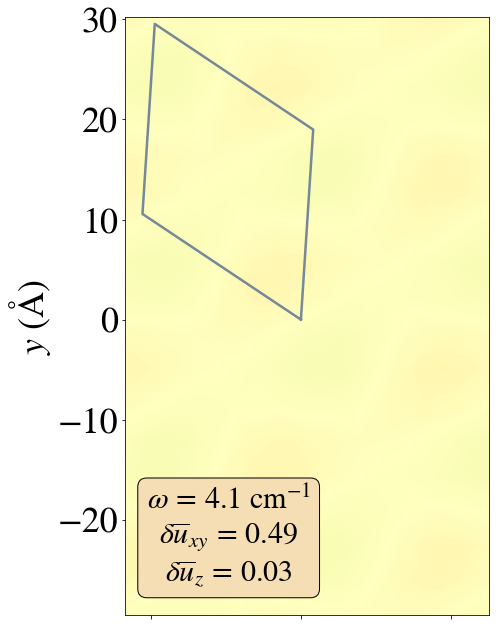

<Figure size 432x288 with 0 Axes>

/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


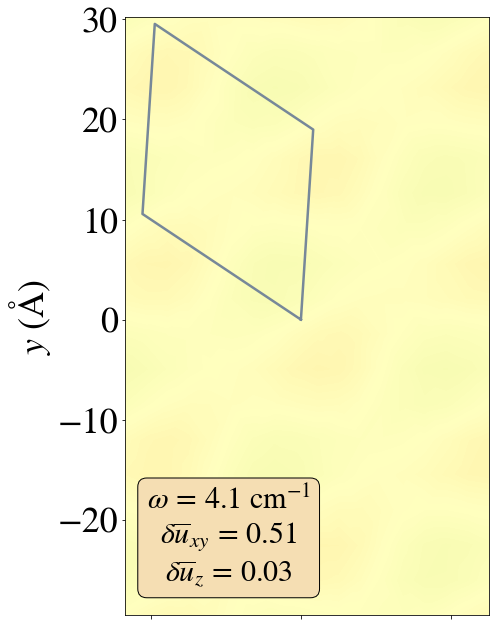

(array([[-17.59669212, -29.54981898],
        [-17.59669212, -26.03474247],
        [-17.59669212, -22.51966597],
        [-17.59669212, -19.00458946],
        [-17.59669212, -15.48951295],
        [-17.59669212, -11.97443645],
        [-17.59669212,  -8.45935994],
        [-17.59669212,  -4.94428344],
        [-17.59669212,  -1.42920693],
        [-17.59669212,   2.08586957],
        [-17.59669212,   5.60094608],
        [-17.59669212,   9.11602259],
        [-17.59669212,  12.63109909],
        [-17.59669212,  16.1461756 ],
        [-17.59669212,  19.6612521 ],
        [-17.59669212,  23.17632861],
        [-17.59669212,  26.69140511],
        [-17.59669212,  30.20648162],
        [-15.45654888, -29.54981898],
        [-15.45654888, -26.03474247],
        [-15.45654888, -22.51966597],
        [-15.45654888, -19.00458946],
        [-15.45654888, -15.48951295],
        [-15.45654888, -11.97443645],
        [-15.45654888,  -8.45935994],
        [-15.45654888,  -4.94428344],
        [-15

In [18]:
# Visualize the real-space phonons
THETA_IDX = 74
WHICH_MODE = 3
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

# k_set[THETA_IDX] = GM_set[THETA_IDX][:2]

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], n_at, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes),
                            rspc_sc_sz=2,
                            outdir=f'{ROOT}/data_mlph')
ph.plot_a_phonon(WHICH_MODE, save=SAVE_S, outname='T.png', 
                 ticky=True, labely=True, labelx=False, reduce_tick=True)

Analyzing theta = 1.1089 (idx=11)


<Figure size 432x288 with 0 Axes>

/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


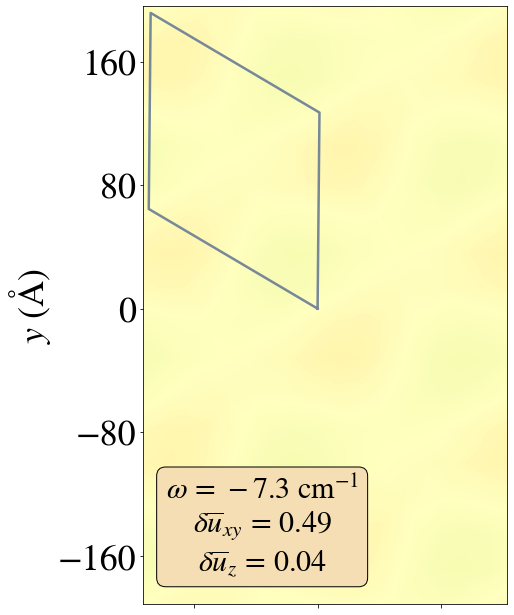

<Figure size 432x288 with 0 Axes>

/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


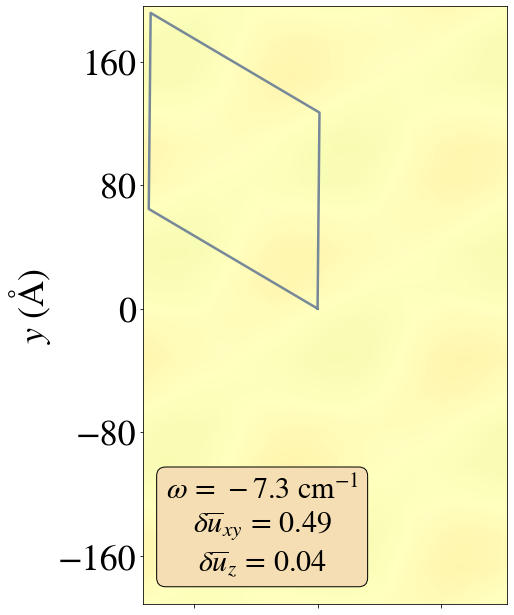

(array([[-113.16712252, -191.48415184],
        [-113.16712252, -168.70629848],
        [-113.16712252, -145.92844513],
        [-113.16712252, -123.15059177],
        [-113.16712252, -100.37273842],
        [-113.16712252,  -77.59488506],
        [-113.16712252,  -54.8170317 ],
        [-113.16712252,  -32.03917835],
        [-113.16712252,   -9.26132499],
        [-113.16712252,   13.51652837],
        [-113.16712252,   36.29438172],
        [-113.16712252,   59.07223508],
        [-113.16712252,   81.85008843],
        [-113.16712252,  104.62794179],
        [-113.16712252,  127.40579515],
        [-113.16712252,  150.1836485 ],
        [-113.16712252,  172.96150186],
        [-113.16712252,  195.73935522],
        [ -99.30065856, -191.48415184],
        [ -99.30065856, -168.70629848],
        [ -99.30065856, -145.92844513],
        [ -99.30065856, -123.15059177],
        [ -99.30065856, -100.37273842],
        [ -99.30065856,  -77.59488506],
        [ -99.30065856,  -54.8170317 ],


In [19]:
# Visualize the real-space phonons
THETA_IDX = 11
WHICH_MODE = 0
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

# k_set[THETA_IDX] = GM_set[THETA_IDX][:2]

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], n_at, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes),
                            rspc_sc_sz=2,
                            outdir=f'{ROOT}/data_mlph')
ph.plot_a_phonon(WHICH_MODE, save=SAVE_S, outname='T.png', 
                 ticky=True, labely=True, labelx=False, reduce_tick=True,
                 shift=0.03)

Analyzing theta = 0.1099 (idx=1)


<Figure size 432x288 with 0 Axes>

/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


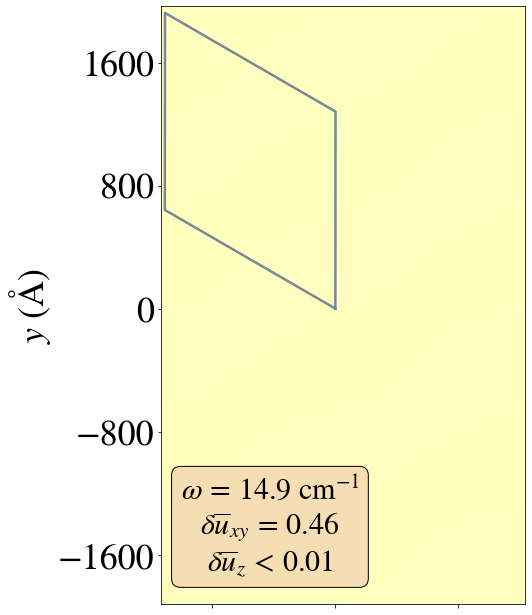

<Figure size 432x288 with 0 Axes>

/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


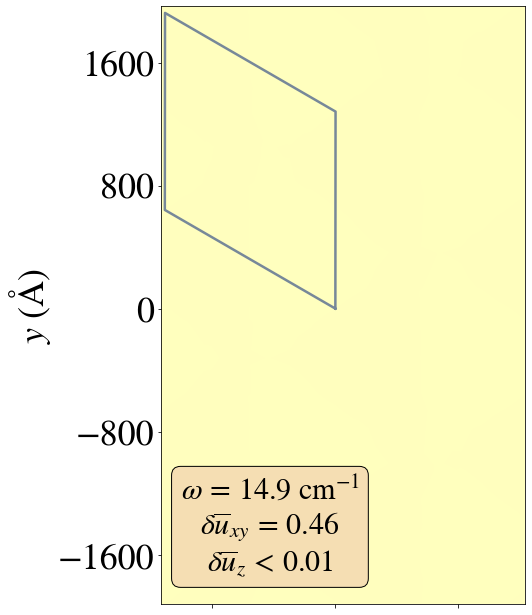

(array([[-1134.7660051 , -1922.47911358],
        [-1134.7660051 , -1693.79205562],
        [-1134.7660051 , -1465.10499767],
        [-1134.7660051 , -1236.41793971],
        [-1134.7660051 , -1007.73088176],
        [-1134.7660051 ,  -779.0438238 ],
        [-1134.7660051 ,  -550.35676585],
        [-1134.7660051 ,  -321.66970789],
        [-1134.7660051 ,   -92.98264994],
        [-1134.7660051 ,   135.70440802],
        [-1134.7660051 ,   364.39146597],
        [-1134.7660051 ,   593.07852393],
        [-1134.7660051 ,   821.76558188],
        [-1134.7660051 ,  1050.45263984],
        [-1134.7660051 ,  1279.13969779],
        [-1134.7660051 ,  1507.82675575],
        [-1134.7660051 ,  1736.5138137 ],
        [-1134.7660051 ,  1965.20087166],
        [ -995.5511872 , -1922.47911358],
        [ -995.5511872 , -1693.79205562],
        [ -995.5511872 , -1465.10499767],
        [ -995.5511872 , -1236.41793971],
        [ -995.5511872 , -1007.73088176],
        [ -995.5511872 ,  -779.043

In [20]:
# Visualize the real-space phonons
THETA_IDX = 1
WHICH_MODE = 21
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

# k_set[THETA_IDX] = GM_set[THETA_IDX][:2]

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], n_at, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes),
                            rspc_sc_sz=2,
                            outdir=f'{ROOT}/data_mlph')
ph.plot_a_phonon(WHICH_MODE, save=SAVE_S, outname='T.png', 
                 ticky=True, labely=True, labelx=False, reduce_tick=True)

### S2

Analyzing theta = 7.4026 (idx=74)


<Figure size 432x288 with 0 Axes>

/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


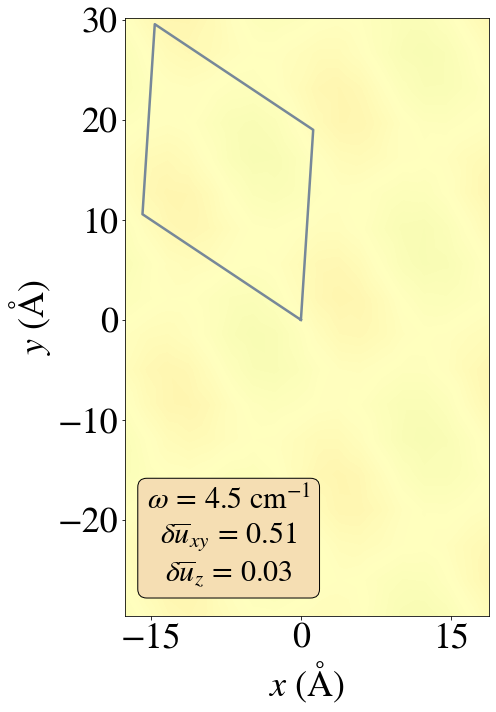

<Figure size 432x288 with 0 Axes>

/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


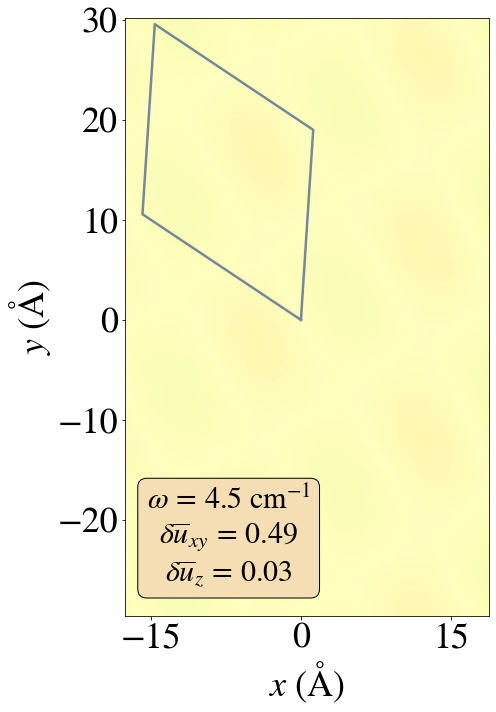

(array([[-17.59669212, -29.54981898],
        [-17.59669212, -26.03474247],
        [-17.59669212, -22.51966597],
        [-17.59669212, -19.00458946],
        [-17.59669212, -15.48951295],
        [-17.59669212, -11.97443645],
        [-17.59669212,  -8.45935994],
        [-17.59669212,  -4.94428344],
        [-17.59669212,  -1.42920693],
        [-17.59669212,   2.08586957],
        [-17.59669212,   5.60094608],
        [-17.59669212,   9.11602259],
        [-17.59669212,  12.63109909],
        [-17.59669212,  16.1461756 ],
        [-17.59669212,  19.6612521 ],
        [-17.59669212,  23.17632861],
        [-17.59669212,  26.69140511],
        [-17.59669212,  30.20648162],
        [-15.45654888, -29.54981898],
        [-15.45654888, -26.03474247],
        [-15.45654888, -22.51966597],
        [-15.45654888, -19.00458946],
        [-15.45654888, -15.48951295],
        [-15.45654888, -11.97443645],
        [-15.45654888,  -8.45935994],
        [-15.45654888,  -4.94428344],
        [-15

In [21]:
# Visualize the real-space phonons
THETA_IDX = 74
WHICH_MODE = 4
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

# k_set[THETA_IDX] = GM_set[THETA_IDX][:2]

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], n_at, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes),
                            rspc_sc_sz=2,
                            outdir=f'{ROOT}/data_mlph')
ph.plot_a_phonon(WHICH_MODE, save=SAVE_S, outname='T.png', 
                 ticky=True, labely=True, labelx=True, reduce_tick=True)

Analyzing theta = 1.1089 (idx=11)


<Figure size 432x288 with 0 Axes>

/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


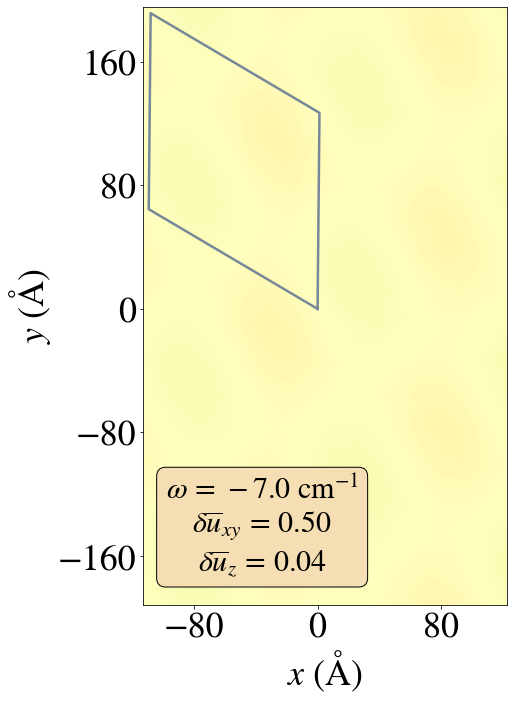

<Figure size 432x288 with 0 Axes>

/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


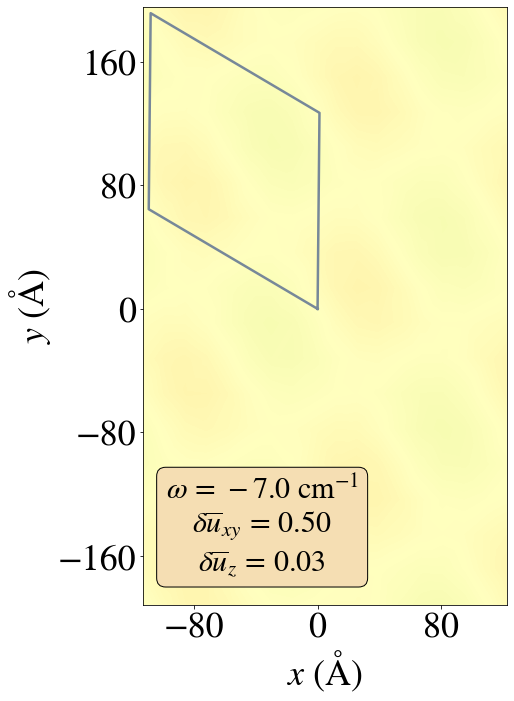

(array([[-113.16712252, -191.48415184],
        [-113.16712252, -168.70629848],
        [-113.16712252, -145.92844513],
        [-113.16712252, -123.15059177],
        [-113.16712252, -100.37273842],
        [-113.16712252,  -77.59488506],
        [-113.16712252,  -54.8170317 ],
        [-113.16712252,  -32.03917835],
        [-113.16712252,   -9.26132499],
        [-113.16712252,   13.51652837],
        [-113.16712252,   36.29438172],
        [-113.16712252,   59.07223508],
        [-113.16712252,   81.85008843],
        [-113.16712252,  104.62794179],
        [-113.16712252,  127.40579515],
        [-113.16712252,  150.1836485 ],
        [-113.16712252,  172.96150186],
        [-113.16712252,  195.73935522],
        [ -99.30065856, -191.48415184],
        [ -99.30065856, -168.70629848],
        [ -99.30065856, -145.92844513],
        [ -99.30065856, -123.15059177],
        [ -99.30065856, -100.37273842],
        [ -99.30065856,  -77.59488506],
        [ -99.30065856,  -54.8170317 ],


In [22]:
# Visualize the real-space phonons
THETA_IDX = 11
WHICH_MODE = 1
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

# k_set[THETA_IDX] = GM_set[THETA_IDX][:2]

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], n_at, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes),
                            rspc_sc_sz=2,
                            outdir=f'{ROOT}/data_mlph')
ph.plot_a_phonon(WHICH_MODE, save=SAVE_S, outname='T.png', 
                 ticky=True, labely=True, labelx=True, reduce_tick=True,
                 shift=0.03)

Analyzing theta = 0.1099 (idx=1)


<Figure size 432x288 with 0 Axes>

/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


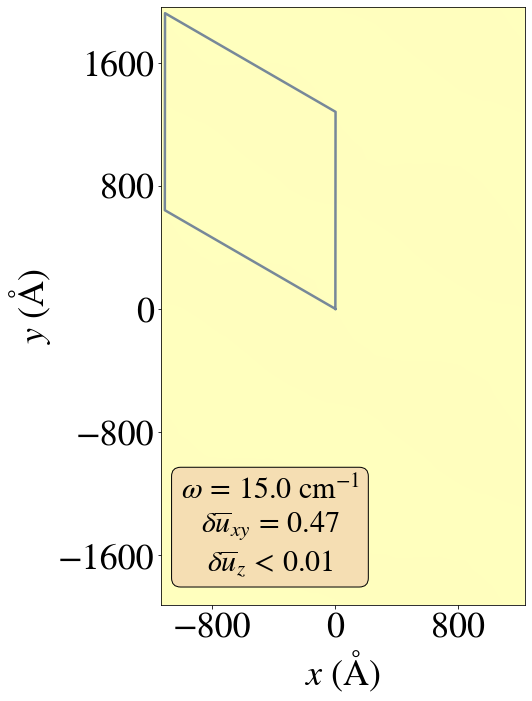

<Figure size 432x288 with 0 Axes>

/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/jonathanlu/miniconda3/lib/python3.7/site-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


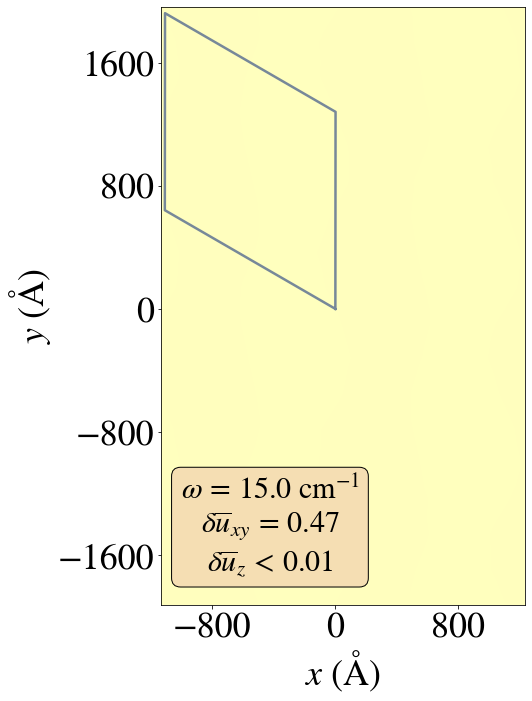

(array([[-1134.7660051 , -1922.47911358],
        [-1134.7660051 , -1693.79205562],
        [-1134.7660051 , -1465.10499767],
        [-1134.7660051 , -1236.41793971],
        [-1134.7660051 , -1007.73088176],
        [-1134.7660051 ,  -779.0438238 ],
        [-1134.7660051 ,  -550.35676585],
        [-1134.7660051 ,  -321.66970789],
        [-1134.7660051 ,   -92.98264994],
        [-1134.7660051 ,   135.70440802],
        [-1134.7660051 ,   364.39146597],
        [-1134.7660051 ,   593.07852393],
        [-1134.7660051 ,   821.76558188],
        [-1134.7660051 ,  1050.45263984],
        [-1134.7660051 ,  1279.13969779],
        [-1134.7660051 ,  1507.82675575],
        [-1134.7660051 ,  1736.5138137 ],
        [-1134.7660051 ,  1965.20087166],
        [ -995.5511872 , -1922.47911358],
        [ -995.5511872 , -1693.79205562],
        [ -995.5511872 , -1465.10499767],
        [ -995.5511872 , -1236.41793971],
        [ -995.5511872 , -1007.73088176],
        [ -995.5511872 ,  -779.043

In [23]:
# Visualize the real-space phonons
THETA_IDX = 1
WHICH_MODE = 22
print(f"Analyzing theta = {thetas[THETA_IDX]} (idx={THETA_IDX})")
coords = mesh[THETA_IDX]

# k_set[THETA_IDX] = GM_set[THETA_IDX][:2]

ph = TwistedRealspacePhonon(thetas[THETA_IDX], k_set[THETA_IDX], 
                            GM_set[THETA_IDX], DMs[THETA_IDX], n_at, 
                            bl_M, poscars_uc, modeidxs=np.arange(nmodes),
                            rspc_sc_sz=2,
                            outdir=f'{ROOT}/data_mlph')
ph.plot_a_phonon(WHICH_MODE, save=SAVE_S, outname='T.png', 
                 ticky=True, labely=True, labelx=True, reduce_tick=True)